In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('CSV\TWAQI.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\OMEN\AppData\Local\Temp\ipykernel_6488\883013361.py:1: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv('CSV\TWAQI.csv')
C:\Users\OMEN\AppData\Local\Temp\ipykernel_6488\883013361.py:1: DtypeWarning: Columns (36,37,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('CSV\TWAQI.csv')


,location_name,location_latitude,location_longitude,Year,Month,Day,Day of Week,Hour,Minute,Time Bin,Direction,Volume,date,Date_x,HighTemp,AvgTemp,LowTemp,HightDpt,AvgDpt,LowDpt,AvgHum,AvgWind,TotalPrecip,HighPres,AvgPres,LowPres,WindDir,WindSpeed,Visibility,Date_y,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,SO2,PM10,PM25,NO2,is_holiday
0,BURNET RD / PALM WAY (IBM DRIVEWAY),30.402286,-97.717606,2018,8,13,1,21,0,21:00,NB,48,2018-08-13,2018-08-13,96,85,76,77,71,62,69,10,0.58,29,29,29,160.0,12,9,2018-08-13,85,PM2.5,Austin Webberville Rd,48-453-0021,AQS,5,25,1,.,85,11,0
1,BURNET RD / PALM WAY (IBM DRIVEWAY),30.402286,-97.717606,2018,8,13,1,21,0,21:00,NB,58,2018-08-13,2018-08-13,96,85,76,77,71,62,69,10,0.58,29,29,29,160.0,12,9,2018-08-13,85,PM2.5,Austin Webberville Rd,48-453-0021,AQS,5,25,1,.,85,11,0
2,1612 BLK S LAMAR BLVD (Collier),30.250802,-97.765746,2018,8,13,1,21,0,21:00,SB,1,2018-08-13,2018-08-13,96,85,76,77,71,62,69,10,0.58,29,29,29,160.0,12,9,2018-08-13,85,PM2.5,Austin Webberville Rd,48-453-0021,AQS,5,25,1,.,85,11,0
3,1612 BLK S LAMAR BLVD (Collier),30.250802,-97.765746,2018,8,13,1,21,0,21:00,SB,215,2018-08-13,2018-08-13,96,85,76,77,71,62,69,10,0.58,29,29,29,160.0,12,9,2018-08-13,85,PM2.5,Austin Webberville Rd,48-453-0021,AQS,5,25,1,.,85,11,0
4,1612 BLK S LAMAR BLVD (Collier),30.250802,-97.765746,2018,8,13,1,21,0,21:00,NB,124,2018-08-13,2018-08-13,96,85,76,77,71,62,69,10,0.58,29,29,29,160.0,12,9,2018-08-13,85,PM2.5,Austin Webberville Rd,48-453-0021,AQS,5,25,1,.,85,11,0


In [3]:
df['datetime'] = pd.to_datetime(df.date+" "+df['Time Bin'])

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.isna().sum()

location_name                       0
location_latitude                   0
location_longitude                  0
Year                                0
Month                               0
Day                                 0
Day of Week                         0
Hour                                0
Minute                              0
Time Bin                            0
Direction                      166019
Volume                              0
date                                0
Date_x                              0
HighTemp                            0
AvgTemp                             0
LowTemp                             0
HightDpt                            0
AvgDpt                              0
LowDpt                              0
AvgHum                              0
AvgWind                             0
TotalPrecip                         0
HighPres                            0
AvgPres                             0
LowPres                             0
WindDir     

In [6]:
df['location_name'] = df.location_name.apply(lambda x: x.strip())

In [7]:
df.location_name.value_counts()

location_name
CAPITAL OF TEXAS HWY / WALSH TARLTON LN                297928
100 BLK S CONGRESS AVE (Congress Bridge)               253491
CAPITAL OF TEXAS HWY / LAKEWOOD DR                     246669
700 BLK E CESAR CHAVEZ ST                              227533
BURNET RD / RUTLAND DR                                 202062
BURNET RD / PALM WAY (IBM DRIVEWAY)                    200821
LAMAR BLVD / SANDRA MURAIDA WAY (Lamar Bridge)         176043
1000 BLK W CESAR CHAVEZ ST (H&B Trail Underpass)       174019
LAMAR BLVD / SHOAL CREEK BLVD                          174017
LAMAR BLVD / ZENNIA ST                                 167534
3201 BLK S LAMAR BLVD (BROKEN SPOKE)                   166019
LAMAR BLVD / MANCHACA RD                               160139
CAPITAL OF TEXAS HWY / CEDAR ST                        144011
LAMAR BLVD / N LAMAR SB TO W 15TH RAMP                 142975
1612 BLK S LAMAR BLVD (Collier)                        136822
CONGRESS AVE / JOHANNA ST (Fulmore Middle School)      1

In [31]:
redundants = ['Time Bin', 'date', 'Date_x', 'Date_y']
df.drop(redundants, axis=1,  inplace=True)

KeyError: "['Time Bin', 'date', 'Date_x', 'Date_y'] not found in axis"

In [9]:
df.Direction.value_counts()

Direction
SB    1348214
NB    1156359
EB     223084
WB     178468
Name: count, dtype: int64

In [10]:
df.Volume.describe()

count    3.072144e+06
mean     7.387232e+01
std      6.395332e+01
min      0.000000e+00
25%      1.500000e+01
50%      6.000000e+01
75%      1.190000e+02
max      2.550000e+02
Name: Volume, dtype: float64

In [11]:
df.location_name.value_counts()

location_name
CAPITAL OF TEXAS HWY / WALSH TARLTON LN                297928
100 BLK S CONGRESS AVE (Congress Bridge)               253491
CAPITAL OF TEXAS HWY / LAKEWOOD DR                     246669
700 BLK E CESAR CHAVEZ ST                              227533
BURNET RD / RUTLAND DR                                 202062
BURNET RD / PALM WAY (IBM DRIVEWAY)                    200821
LAMAR BLVD / SANDRA MURAIDA WAY (Lamar Bridge)         176043
1000 BLK W CESAR CHAVEZ ST (H&B Trail Underpass)       174019
LAMAR BLVD / SHOAL CREEK BLVD                          174017
LAMAR BLVD / ZENNIA ST                                 167534
3201 BLK S LAMAR BLVD (BROKEN SPOKE)                   166019
LAMAR BLVD / MANCHACA RD                               160139
CAPITAL OF TEXAS HWY / CEDAR ST                        144011
LAMAR BLVD / N LAMAR SB TO W 15TH RAMP                 142975
1612 BLK S LAMAR BLVD (Collier)                        136822
CONGRESS AVE / JOHANNA ST (Fulmore Middle School)      1

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3072144 entries, 0 to 3150123
Data columns (total 39 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   location_name               object        
 1   location_latitude           float64       
 2   location_longitude          float64       
 3   Year                        int64         
 4   Month                       int64         
 5   Day                         int64         
 6   Day of Week                 int64         
 7   Hour                        int64         
 8   Minute                      int64         
 9   Direction                   object        
 10  Volume                      int64         
 11  HighTemp                    int64         
 12  AvgTemp                     int64         
 13  LowTemp                     int64         
 14  HightDpt                    int64         
 15  AvgDpt                      int64         
 16  LowDpt                 

In [15]:
df[(df.Hour > 7) & (df.Hour < 11)].corr()['Volume']

ValueError: could not convert string to float: '1000 BLK W CESAR CHAVEZ ST (H&B Trail Underpass)'

In [14]:
df.corr()['Volume']

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_12904\3137653987.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Volume']


location_latitude    -0.092493
location_longitude   -0.091550
Year                  0.030324
Month                -0.016052
Day                   0.001608
Day of Week           0.064096
Hour                  0.385871
Minute               -0.000933
Volume                1.000000
HighTemp              0.011637
AvgTemp               0.011132
LowTemp               0.006452
HightDpt              0.004413
AvgDpt                0.004106
LowDpt                0.003050
AvgHum               -0.017258
AvgWind               0.010592
TotalPrecip          -0.003270
HighPres             -0.008186
AvgPres              -0.005302
LowPres              -0.005517
WindDir               0.000849
WindSpeed             0.003305
Visibility            0.019547
Overall AQI Value     0.008832
CO                   -0.009648
PM25                 -0.005501
is_holiday           -0.041143
Name: Volume, dtype: float64

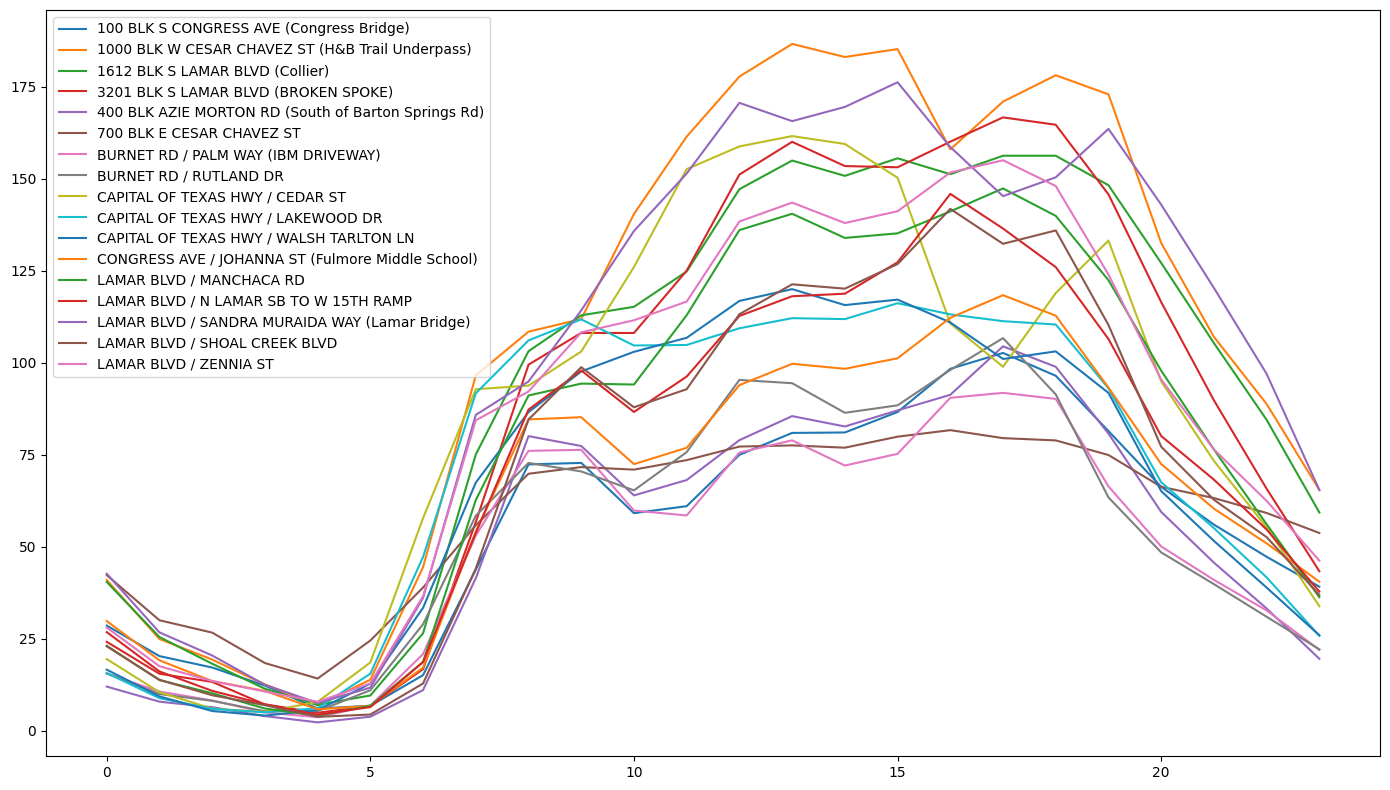

In [15]:
plt.figure(figsize=(14, 8))
for location_name, group in df.groupby('location_name'):
    group = group.groupby('Hour').Volume.mean()
    plt.plot(group.index, group.values, label=location_name)
plt.legend()
plt.tight_layout()
plt.show()

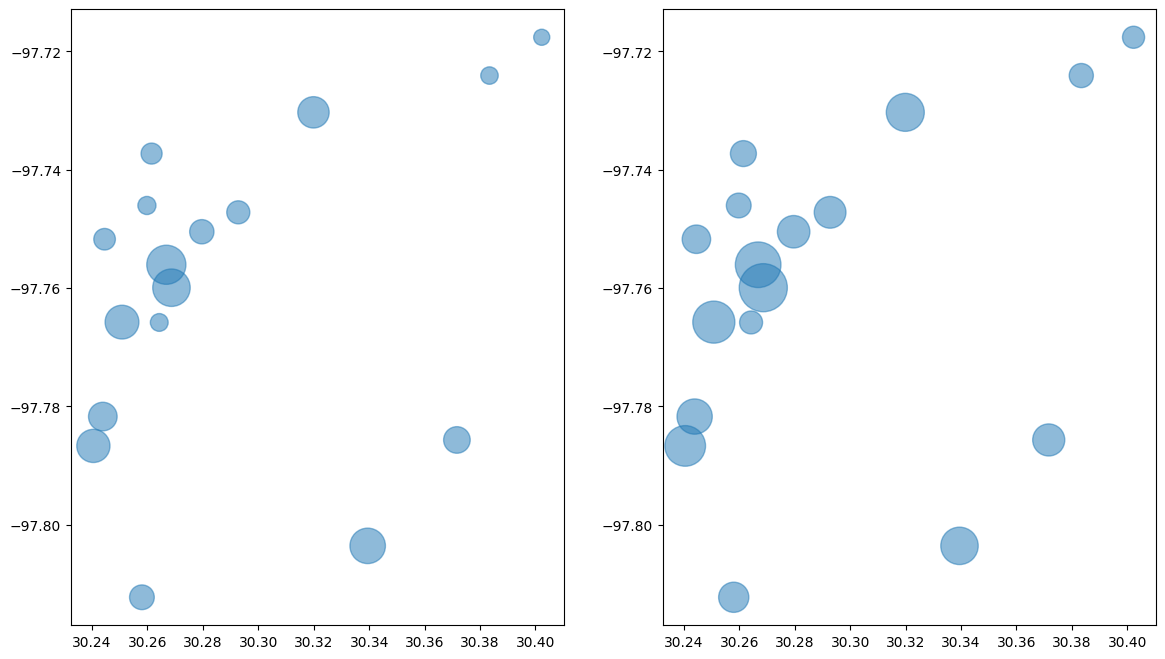

In [84]:
holiday = df[df.is_holiday == 1]
t = holiday.groupby(['location_latitude', 'location_longitude']).Volume.mean().reset_index()
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.scatter(t.location_latitude, t.location_longitude, s=(t.Volume**2)/10, alpha=0.5)

non_holiday = df[df.is_holiday == 0]
t = non_holiday.groupby(['location_latitude', 'location_longitude']).Volume.mean().reset_index()
plt.subplot(1, 2, 2)
plt.scatter(t.location_latitude, t.location_longitude, s=(t.Volume**2)/10, alpha=0.5)

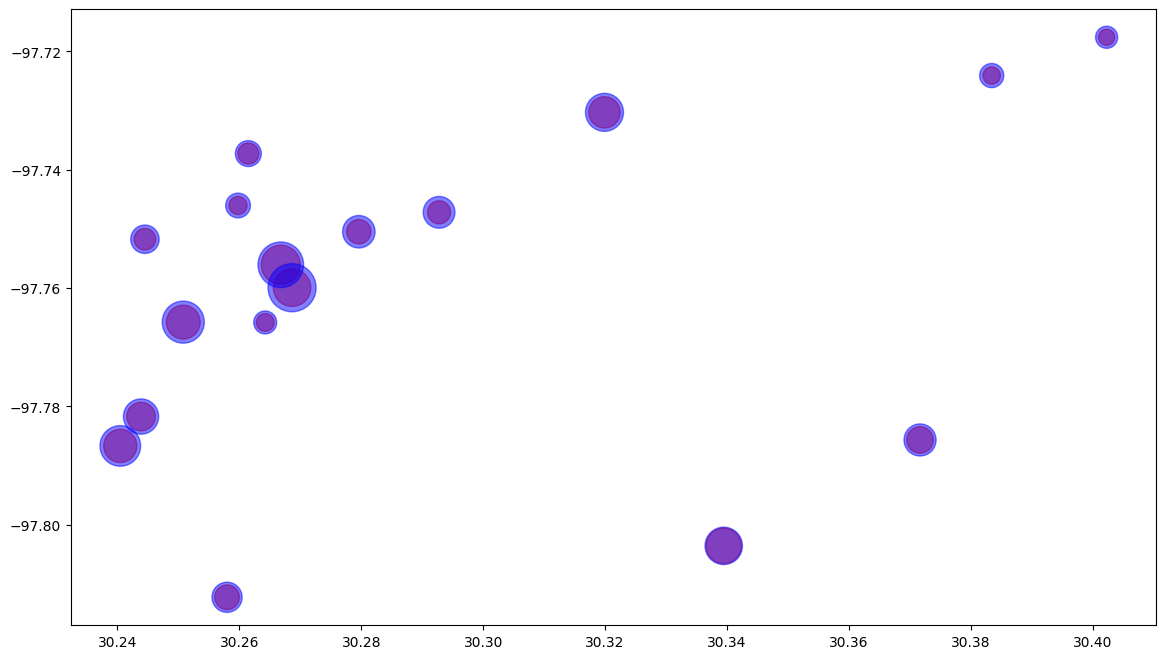

In [87]:
holiday = df[df.is_holiday == 1]
t = holiday.groupby(['location_latitude', 'location_longitude']).Volume.mean().reset_index()
plt.figure(figsize=(14, 8))
plt.scatter(t.location_latitude, t.location_longitude, s=(t.Volume**2)/10, alpha=0.5, color='red')

non_holiday = df[df.is_holiday == 0]
t = non_holiday.groupby(['location_latitude', 'location_longitude']).Volume.mean().reset_index()
plt.scatter(t.location_latitude, t.location_longitude, s=(t.Volume**2)/10, alpha=0.5, color='blue')

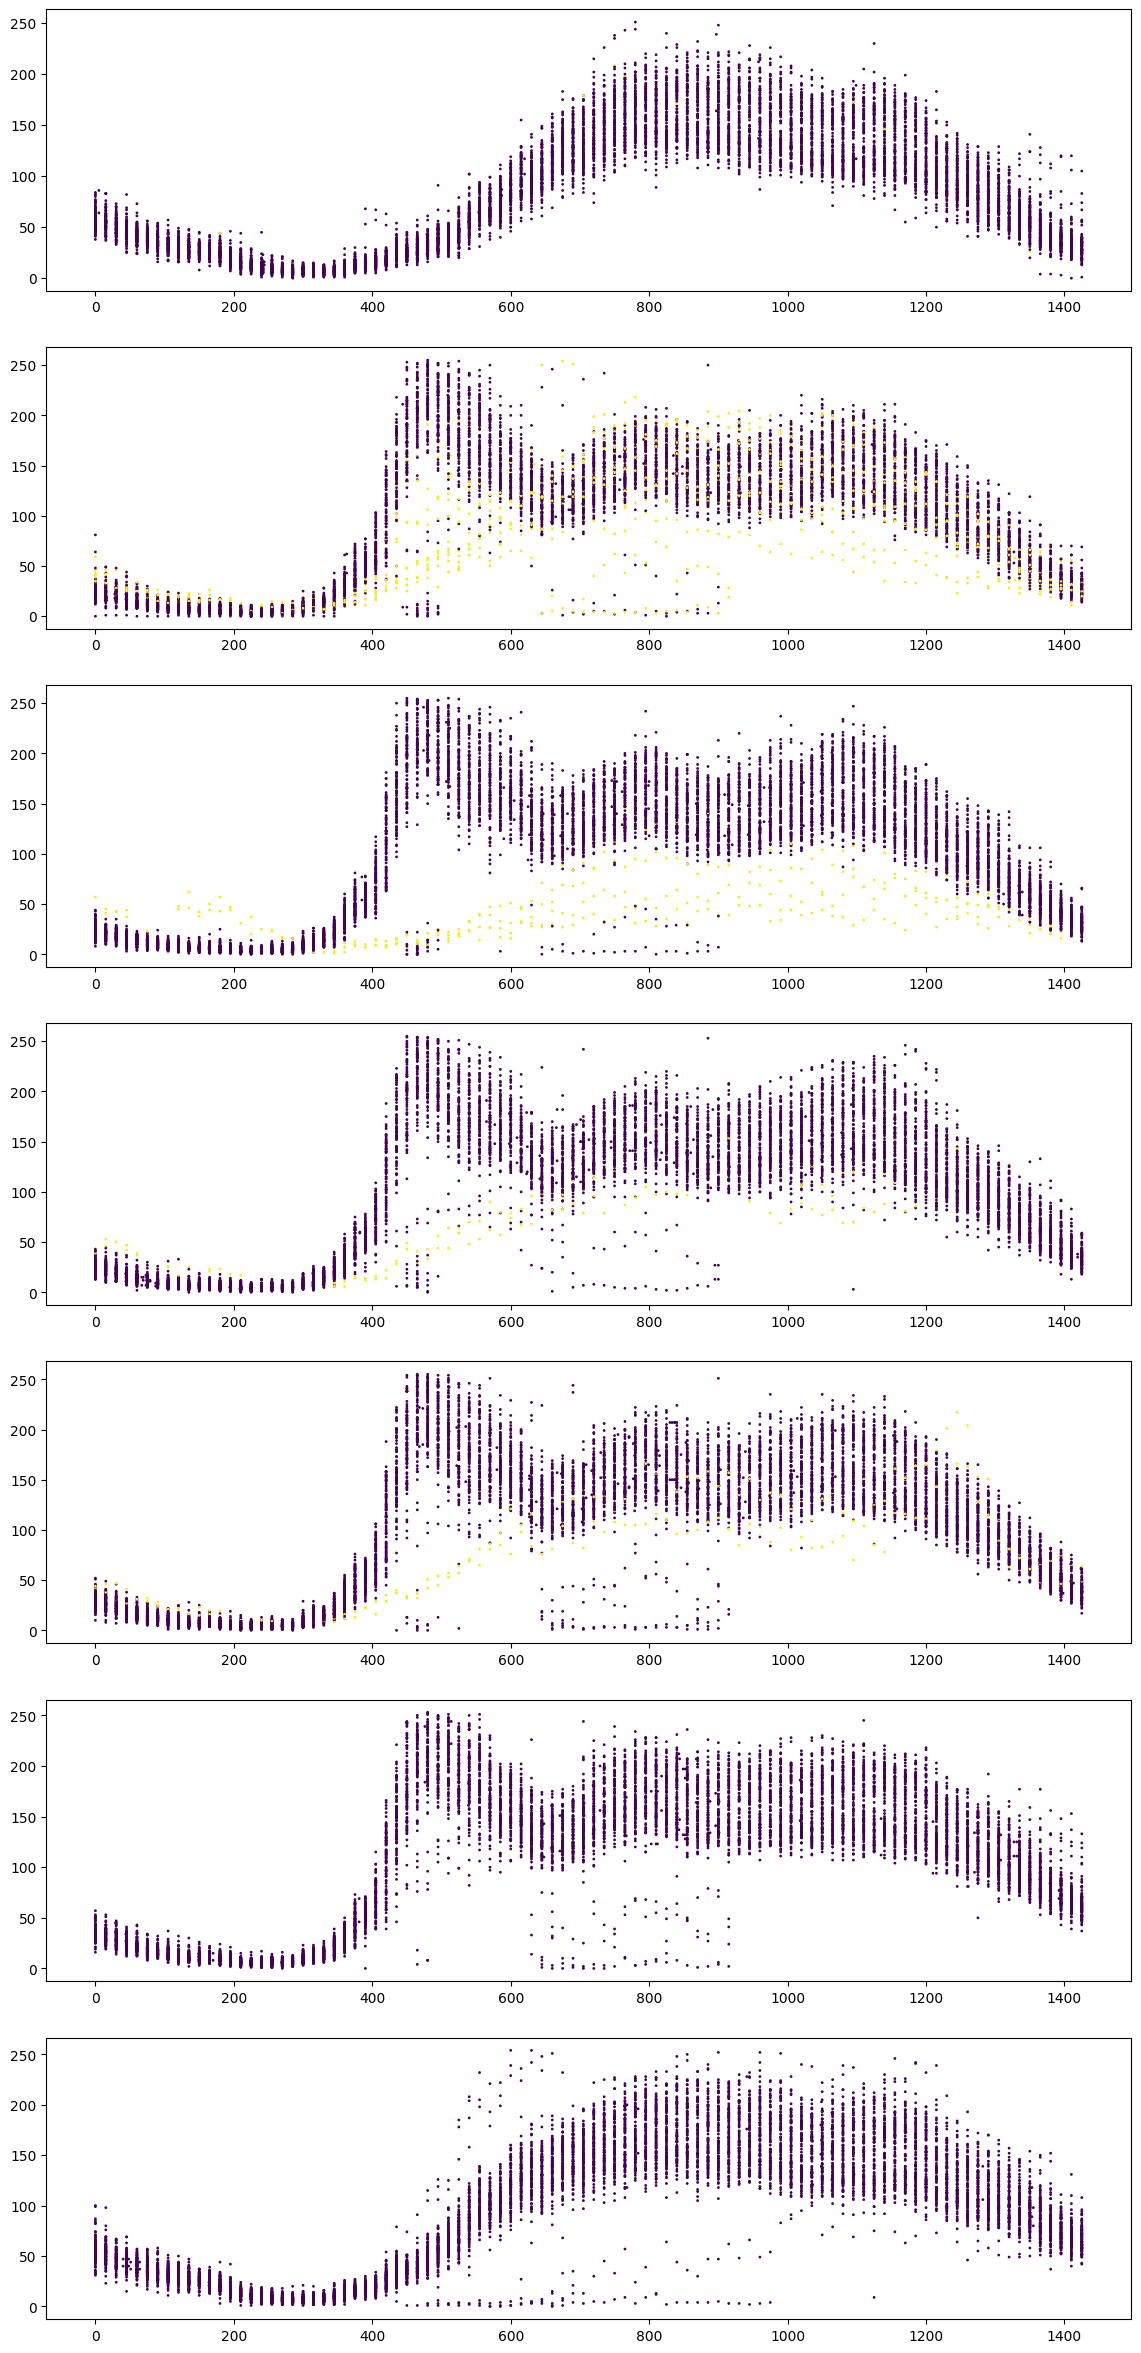

In [35]:
location_name = df.location_name.unique()[1]
direction = df[(df.location_name == location_name)].Direction.unique()[1]
plt.figure(figsize=(14, 30))
for day_of_week in range(7):
    plt.subplot(7, 1, day_of_week+1)
    subset = df[(df.location_name == location_name) & (df['Day of Week'] == day_of_week) & (df.Direction == direction)]
    plt.scatter(subset.Hour*60+subset.Minute, subset.Volume, c=subset['is_holiday'], s=1)

In [71]:
holiday

,location_name,location_latitude,location_longitude,Year,Month,Day,Day of Week,Hour,Minute,Direction,Volume,HighTemp,AvgTemp,LowTemp,HightDpt,AvgDpt,LowDpt,AvgHum,AvgWind,TotalPrecip,HighPres,AvgPres,LowPres,WindDir,WindSpeed,Visibility,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,SO2,PM10,PM25,NO2,is_holiday
226338,LAMAR BLVD / SANDRA MURAIDA WAY (Lamar Bridge),30.266800,-97.756051,2018,10,8,1,3,0,NB,31,83,76,72,76,73,70,90,1,0.0,29,29,29,110.0,6,8,31,PM2.5,Austin North Interstate 35,48-453-1068,AQS,6,22,0,.,31,22,1
226339,LAMAR BLVD / SANDRA MURAIDA WAY (Lamar Bridge),30.266800,-97.756051,2018,10,8,1,3,0,NB,16,83,76,72,76,73,70,90,1,0.0,29,29,29,110.0,6,8,31,PM2.5,Austin North Interstate 35,48-453-1068,AQS,6,22,0,.,31,22,1
226340,LAMAR BLVD / SANDRA MURAIDA WAY (Lamar Bridge),30.266800,-97.756051,2018,10,8,1,3,0,SB,18,83,76,72,76,73,70,90,1,0.0,29,29,29,110.0,6,8,31,PM2.5,Austin North Interstate 35,48-453-1068,AQS,6,22,0,.,31,22,1
226341,LAMAR BLVD / SANDRA MURAIDA WAY (Lamar Bridge),30.266800,-97.756051,2018,10,8,1,3,0,SB,12,83,76,72,76,73,70,90,1,0.0,29,29,29,110.0,6,8,31,PM2.5,Austin North Interstate 35,48-453-1068,AQS,6,22,0,.,31,22,1
226342,100 BLK S CONGRESS AVE (Congress Bridge),30.259791,-97.746034,2018,10,8,1,3,0,NB,15,83,76,72,76,73,70,90,1,0.0,29,29,29,110.0,6,8,31,PM2.5,Austin North Interstate 35,48-453-1068,AQS,6,22,0,.,31,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999205,LAMAR BLVD / N LAMAR SB TO W 15TH RAMP,30.279604,-97.750472,2019,10,14,1,11,0,NB,81,88,76,69,72,68,59,77,0,0.0,29,29,29,NaN,3,7,52,PM2.5,Austin Webberville Rd,48-453-0021,AQS,6,35,0,.,52,15,1
2999206,LAMAR BLVD / N LAMAR SB TO W 15TH RAMP,30.279604,-97.750472,2019,10,14,1,18,0,SB,153,88,76,69,72,68,59,77,0,0.0,29,29,29,NaN,3,7,52,PM2.5,Austin Webberville Rd,48-453-0021,AQS,6,35,0,.,52,15,1
2999207,LAMAR BLVD / SHOAL CREEK BLVD,30.292767,-97.747190,2019,10,14,1,12,0,SB,98,88,76,69,72,68,59,77,0,0.0,29,29,29,NaN,3,7,52,PM2.5,Austin Webberville Rd,48-453-0021,AQS,6,35,0,.,52,15,1
2999208,LAMAR BLVD / ZENNIA ST,30.319905,-97.730292,2019,10,14,1,11,45,SB,135,88,76,69,72,68,59,77,0,0.0,29,29,29,NaN,3,7,52,PM2.5,Austin Webberville Rd,48-453-0021,AQS,6,35,0,.,52,15,1


In [111]:
df.drop(['WindDir', 'Site Name (of Overall AQI)', 'Site ID (of Overall AQI)', 'Source (of Overall AQI)'], axis=1, inplace=True)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3072144 entries, 0 to 3150123
Data columns (total 28 columns):
 #   Column              Dtype  
---  ------              -----  
 0   location_name       object 
 1   location_latitude   float64
 2   location_longitude  float64
 3   Year                int64  
 4   Month               int64  
 5   Day                 int64  
 6   Day of Week         int64  
 7   Hour                int64  
 8   Minute              int64  
 9   Direction           object 
 10  Volume              int64  
 11  HighTemp            int64  
 12  AvgTemp             int64  
 13  LowTemp             int64  
 14  HightDpt            int64  
 15  AvgDpt              int64  
 16  LowDpt              int64  
 17  AvgHum              int64  
 18  AvgWind             int64  
 19  TotalPrecip         float64
 20  HighPres            int64  
 21  AvgPres             int64  
 22  LowPres             int64  
 23  WindSpeed           int64  
 24  Visibility          int6

In [16]:
df.drop(['CO', 'Ozone', 'SO2', 'PM10', 'PM25', 'NO2'], axis=1, inplace=True)

In [127]:
df.isna().sum()

location_name         0
location_latitude     0
location_longitude    0
Year                  0
Month                 0
Day                   0
Day of Week           0
Hour                  0
Minute                0
Direction             0
Volume                0
HighTemp              0
AvgTemp               0
LowTemp               0
HightDpt              0
AvgDpt                0
LowDpt                0
AvgHum                0
AvgWind               0
TotalPrecip           0
HighPres              0
AvgPres               0
LowPres               0
WindSpeed             0
Visibility            0
Overall AQI Value     0
Main Pollutant        0
is_holiday            0
dtype: int64

In [97]:
df.location_name.unique().shape

(17,)

In [108]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [129]:
for column in df.select_dtypes('object').columns:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])

In [105]:
encoder = OneHotEncoder()
encoded_locations = encoder.fit_transform(df.location_name.values.reshape(-1, 1))

In [107]:
encoded_locations.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [133]:
scaled_df.shape

(3072144, 28)

In [134]:
scaled_df

array([[-0.39551449,  2.04766055,  1.5328045 , ...,  2.2253507 ,
         1.03120211, -0.17946863],
       [-0.39551449,  2.04766055,  1.5328045 , ...,  2.2253507 ,
         1.03120211, -0.17946863],
       [-1.21991942, -0.81798633, -0.17628059, ...,  2.2253507 ,
         1.03120211, -0.17946863],
       ...,
       [-0.39551449,  2.04766055,  1.5328045 , ..., -0.25208532,
         1.03120211, -0.17946863],
       [ 0.42889045, -0.68208402, -1.82720614, ..., -0.25208532,
         1.03120211, -0.17946863],
       [ 0.42889045, -0.68208402, -1.82720614, ..., -0.25208532,
         1.03120211, -0.17946863]])

In [135]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_df = scaler.fit_transform(df)

In [136]:
scaled_df

array([[-0.25      ,  1.        ,  1.        , ...,  0.42857143,
         1.        , -1.        ],
       [-0.25      ,  1.        ,  1.        , ...,  0.42857143,
         1.        , -1.        ],
       [-0.75      , -0.87231021, -0.01730933, ...,  0.42857143,
         1.        , -1.        ],
       ...,
       [-0.25      ,  1.        ,  1.        , ..., -0.39047619,
         1.        , -1.        ],
       [ 0.25      , -0.78351655, -1.        , ..., -0.39047619,
         1.        , -1.        ],
       [ 0.25      , -0.78351655, -1.        , ..., -0.39047619,
         1.        , -1.        ]])

In [47]:
from datetime import datetime, timedelta

In [52]:
dt = '2024/08/10 16:29:00'

In [53]:
dt = datetime.strptime(dt, "%Y/%m/%d %H:%M:%S")

In [60]:
datetime.now()-dt

datetime.timedelta(days=31, seconds=402, microseconds=134566)

In [58]:
dt-timedelta(days=365)

datetime.datetime(2023, 8, 11, 16, 29)